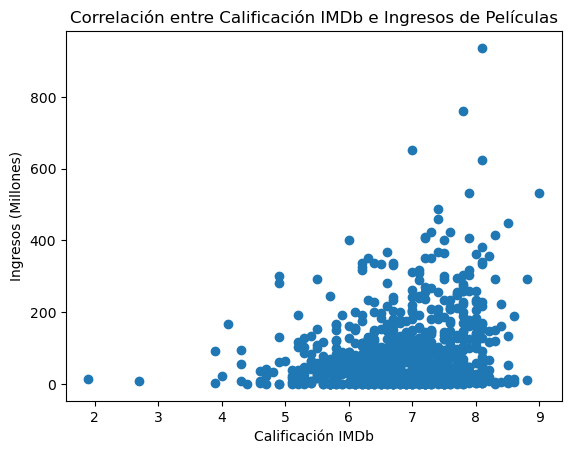

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga el conjunto de datos desde el archivo CSV descargado
df = pd.read_csv("IMDB-Movie-Data.csv")  

# Selecciona las columnas relevantes
selected_columns = ['Title', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)']
df = df[selected_columns]

# Convierte las columnas seleccionadas a un array de NumPy
data_array = df.to_numpy()

# Maneja valores faltantes en 'Revenue (Millions)' con la media
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].mean(), inplace=True)

# Análisis estadístico con NumPy
# Calificación promedio de las películas
average_rating = np.mean(data_array[:, 3])

# Película con la duración más larga
longest_duration_movie = data_array[np.argmax(data_array[:, 2])][0]

# Ingreso promedio y mediana
average_revenue = np.mean(data_array[:, 5])
median_revenue = np.median(data_array[:, 5])

# Manipulación de Datos
# Subconjunto de películas lanzadas en los últimos 10 años
recent_movies = data_array[data_array[:, 1].astype(int) >= (pd.to_datetime('today').year - 10)]

# Promedio de votos para este subconjunto
average_votes_recent_movies = np.mean(recent_movies[:, 4])

# Correlación
# Calificación IMDb vs. Ingresos de las películas
correlation = np.corrcoef(data_array[:, 3].astype(float), data_array[:, 5].astype(float))[0, 1]

# Representa la correlación con matplotlib.pyplot
plt.scatter(data_array[:, 3].astype(float), data_array[:, 5].astype(float))
plt.title('Correlación entre Calificación IMDb e Ingresos de Películas')
plt.xlabel('Calificación IMDb')
plt.ylabel('Ingresos (Millones)')
plt.show()
